# Introdução 

Hoje em dia, muitas pessoas alugam casas seja para morar ou viagens. há diversos aplicativos qde locação de casas, Airbnb sendo um dos mais famosos. Bom , nesso projeto iremos analisar dados de algumas locações aqui do Brasil, verificar o tipo de aluguel , preço do aluguel , saber o que faz com que um alguel seja caro e quais tipos de alugueis as pessoas mais utilizam. 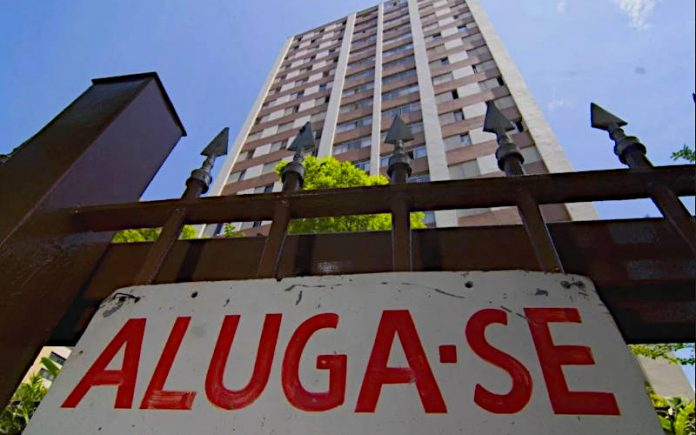

In [1]:
# Importando as bibliotecas necessárias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importando o dataset
df = pd.read_csv('/content/houses_to_rent_v2.csv')

# Análise exploratória
Agora que temos nosso dataset , vamos fazer algumas análises primárias

In [3]:
# Verificando as 5 primeiras entradas do nosso dataset
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Antes de fazer as primeiras análises , vou criar um dicionário de variáveis.

CITY --> `Cidade`

AREA --> `Area da casa`

ROOMS --> `Quantidade de quartos`

BATHROOM --> `Quantidade de banheiros`

PARKING SPACES --> `Quantidade de vagas de estacionamento`

FLOOR --> `andar do imóvel`

ANIMAL --> `Se pode animal no imóvel`

FURNISHED --> `Se o imóvel é mobilhado`

HOA --> `Valor do condomínio`

RENT AMOUNT --> `Valor do aluguel do imóvel`

Agora vamos iniciar as analises 





In [4]:
# Verificando o tamanho do dataset
print("Quantidade de entradas:",df.shape[0])
print('Quantidade de colunas:',df.shape[1])

Quantidade de entradas: 10692
Quantidade de colunas: 13


Já que temos o tamanho do nosso dataset , vamos verificar se há algum valor nulo em alguma coluna

In [5]:
# Verificando as informações gerais do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


De acordo com nossas informações não temos nenhum valor nulo.

In [6]:
# Verificando as descrições estatisticas do dataset
df.describe().round(2)

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


Vamos verificar quais cidades fazem parte do nosso dataset e analisar os preços de cada uma delas.

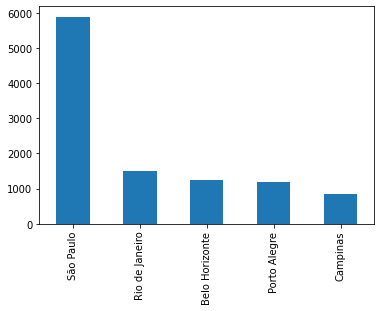

In [7]:
# Vamos ver quais as cidades que compoe nosso dataset e quantas vezes elas aparecem 
df['city'].value_counts().plot(kind='bar')

São Paulo é a cidade que mais tem casas/apartamentos para alugar. Qual deve ser o local mais caro entre as cidades ? 

## Informações dos preços por cidade

In [8]:
# Verificando os preços 
df.groupby('city')['rent amount (R$)'].describe().round(2)[['min','max','mean']]

,min,max,mean
city,,,
Belo Horizonte,450.0,15000.0,3664.13
Campinas,500.0,15000.0,2364.29
Porto Alegre,500.0,19000.0,2337.70
Rio de Janeiro,500.0,15000.0,3232.90
São Paulo,500.0,45000.0,4652.79


De acordo com os dados, podemos dizer que as cidades mais baratas para alugar um imóvel são `Campinas` e `Porto Alegre`. A média do aluguel é de R$2.300,00. Essas cidades são mais baratas porque devem ser as menos procuradas na hora de alugar um imóvel.

## Verificando se algumas métricas interferem no preço 


### Imóvel mobilhado é mais caro ? 

In [9]:
print('Média do aluguel com a casa mobilhada:',df.query('furniture == "furnished" ')['rent amount (R$)'].median())
print('Média do aluguel com a casa não mobilhada:',df.query('furniture == "not furnished" ')['rent amount (R$)'].median())

Média do aluguel com a casa mobilhada: 3500.0
Média do aluguel com a casa não mobilhada: 2400.0


De acordo com os dados um imóvel mobilhado é mais caro de alugar

### Quais cidades mais permitem ter animais e será que isso influência no preço do aluguel ? 

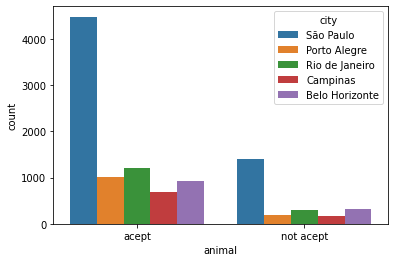

In [10]:
# Cidades que mais permitem animais
sns.countplot(x=df['animal'], hue=df['city'],data=df)

São Paulo é a cidade que mais aceita animal, em seguida vem o Rio de Janeiro como a segunda cidade que mais aceita animais. Agora vamos ver se isso influência no preço.

In [11]:
# Verificando os preços.
print('Média do aluguel de casas que aceitam animais',df.query('animal == "acept"')['rent amount (R$)'].median())
print('Média do aluguel de casas que não aceitam animais',df.query('animal == "not acept"')['rent amount (R$)'].median())

Média do aluguel de casas que aceitam animais 2791.5
Média do aluguel de casas que não aceitam animais 2385.0


De acordo com os dados , casas que aceitam animais tem o aluguel mais caro.

### Será que o tamanho do imóvel influência no preço do aluguel ? 

Primeiro vamos verificar quais cidades tem os maiores imóveis para alugar.

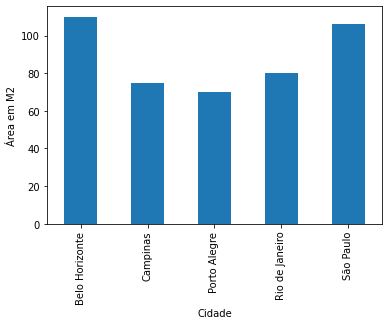

In [12]:
df.groupby('city')['area'].median().plot(kind='bar')
plt.xlabel('Cidade')
plt.ylabel('Área em M2')
plt.show()

Os maiores imóveis para alugar são nas cidades de São Paulo e Belo Horizonte, esse pode ser um dos motivos do porquê são as cidades com os alugueis mais caros.

Agora vamos ver se os tamanhos realmente influenciam os preços 

In [18]:
# média dos preços por area 
df.groupby('city')[['area','rent amount (R$)']].mean().round(2)

,area,rent amount (R$)
city,,
Belo Horizonte,207.41,3664.13
Campinas,137.56,2364.29
Porto Alegre,103.61,2337.70
Rio de Janeiro,105.35,3232.90
São Paulo,158.90,4652.79


O alguel em `São Paulo` é o mais caro entre as cidades mesmo os imóveis não sendo os maiores. Isso pode acontecer porque é a cidade mais populosa do Brasil e uma das mais populosas do MUNDO. Oferecendo melhores oportunidades de empregos, estudos e vida.

### Será que as vagas de estacionamento influenciam no preço do imóvel ? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


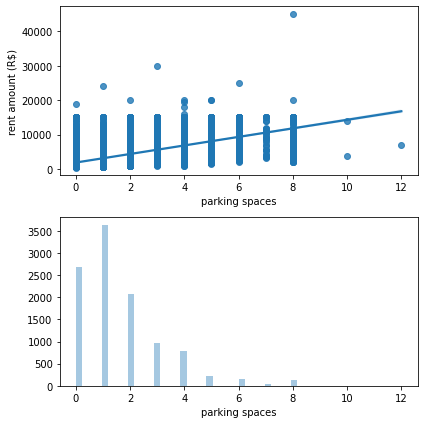

In [14]:
plt.figure(figsize =(6,6))
plt.subplot(2,1,1)
ax = sns.regplot(df['parking spaces'],df['rent amount (R$)'])
plt.subplot(2,1,2)
sns.distplot(df['parking spaces'],kde =False)
plt.tight_layout()


De acordo com os dados, não há muita correlação entre as vagas e os preços porém a maioria das pessoas quando estão procurando uma casa para alugar preferem um imóvel que tenha pelo menos 1 vaga. 

### Será que o seguro contra fogo influência no preço ? 

 MAS O QUE É SEGURO INCÊNCDIO ???.O seguro incêndio é um dos temas mais discutidos quando o assunto é a locação de imóveis. É comum que locador e locatário tenham dúvidas sobre quem deve pagá-lo. Entretanto, é importante que a contratação seja feita para  garantir a proteção da propriedade.

In [15]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


<function matplotlib.pyplot.tight_layout>

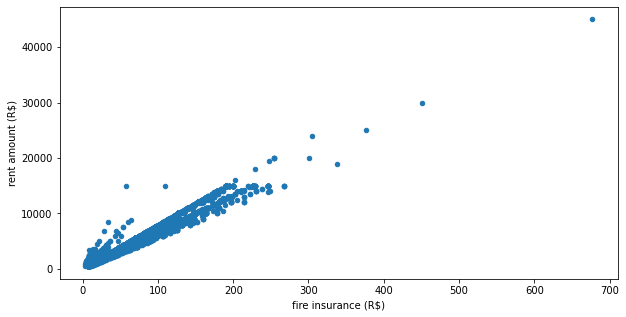

In [16]:
fig , ax = plt.subplots(figsize=(10,5))

df.plot.scatter(x= 'fire insurance (R$)', y= 'rent amount (R$)', ax=ax)

plt.tight_layout

De acordo com o gráfico existe uma correlação muito grande entre o aluguel e o seguro de incêndio, se o preço do seguro de incêndio é maior, logo o alguel também será. Agora vamos ver o preço do seguro de incêndio por cidade e verificar qual a cidade com o valor mais caro. 

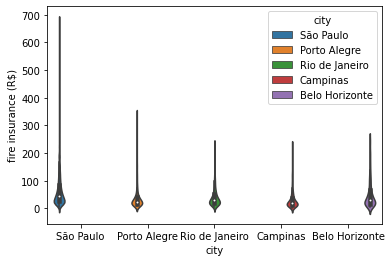

In [17]:
sns.violinplot(x='city', y= 'fire insurance (R$)',data=df, hue='city')

Podemos ver no gráfico que São Paulo e Porto Alegre tem os valores mais altos. 

# Conclusão

De acordo com essa breve análise nos dados podemos perceber que algumas variáveis pode influenciar no preço do aluguel.Nota-se que as distribuições das localidades dos imóveis estão bem distribuidas, o que não distorce as informações estátisticas das variáveis.

Podemos perceber que durante a analise algumas cidades tinham um custo mais alto, como por exemplo São Paulo que é uma das maiores cidades do mundo, logo, acaba tendo um custo de vida um pouco maior que as outras cidades.
